# EDA on Netflix Daily Top 10 dataset


## Data Summary

NETFLIX DAILY TOP 10 2020 – 2022 (United States)

Over-the-top (OTT) media services have expanded in recent years. One of the top OTT services with the most subscribers and watchers is Netflix.  
We can examine the audience and movie content thanks to Netflix's distribution of the daily Top 10 Movies and TV Shows for various weeks and days. The total number of days this program spent in the top 10—not necessarily in order—is displayed in the Days in Top 10 column. Each show receives a score based on its historical daily Rank, with 10 points awarded for each position one, 9 points for each position two, etc.


In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import missingno as ms
import squarify as sq
import matplotlib.pyplot as plt
from wordcloud import WordCloud,  STOPWORDS, ImageColorGenerator
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load the dataset

In [2]:
netflix_df = pd.read_csv("netflix daily top 10.csv")
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


## Data Cleaning

### The data explained per column

As of - The first day the show was is the daily top 10 - Date - Ordinal data 

Rank  - Score based on the shows historical rating - Numerical data

Year to Date Rank - Score from the beginning of 2020 to now or the last date the daily top 10 was taken - Numerical data 

Last Week Rank - Score in the last week of the show being in the daily top 10 - Numerical data 

Title - Name of the show - Categorical data  

Type  - The type of show (TV Shows, movies, Stand up comedy or concert) - Categorical data   

Netflix Exclusive - Whether the show is a Netflix show or not - Categorical data

Netflix Release Date - The date the show was released on Netflix - Ordinal data

Days In Top 10 - The number of days the show was in the daily top 10 - Numerical data  

Viewership Score - measures how many people are in an audience - Numerical data (The Viewership Score is a score assigned to each show based on its historical daily Rank, assigning 10 points for each no. 1 ranking, 9 points for each no. 2 ranking etc.)


### Correcting data types
#### There is a few columns whose data type comes in the way of the data usability. The info() function helps look into this

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
netflix_df.nunique()

As of                   710
Rank                     10
Year to Date Rank        11
Last Week Rank           11
Title                   645
Type                      4
Netflix Exclusive         1
Netflix Release Date    414
Days In Top 10          428
Viewership Score        779
dtype: int64

#### The date columns need to be changed from the object data type to datetime. The to_datetime() pandas function helps us do that. This will help us later analyze yearly data at a later stage  

In [5]:
netflix_df['As of']= pd.to_datetime(netflix_df['As of'])
netflix_df['Netflix Release Date']= pd.to_datetime(netflix_df['Netflix Release Date'])
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


### Missing data

In the dataset, there are missing values that are denoted with a "-". I will use the replace() function to replace the "-" with an np.nan so we are able to denote the missing values better

In [6]:
# replace the "-" with a NaN value
netflix_df.replace("-", np.nan, inplace = True)
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,NaN,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,NaN,Blood Father,Movie,NaN,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,2022-02-25,14,100
7097,2022-03-11,8,8,NaN,Shooter,Movie,NaN,2014-08-01,3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,2022-03-01,10,33


In [7]:
missing_values = netflix_df.isnull().sum()
missing_values

As of                      0
Rank                       0
Year to Date Rank        859
Last Week Rank          3968
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

#### Missing data visualization

<AxesSubplot: >

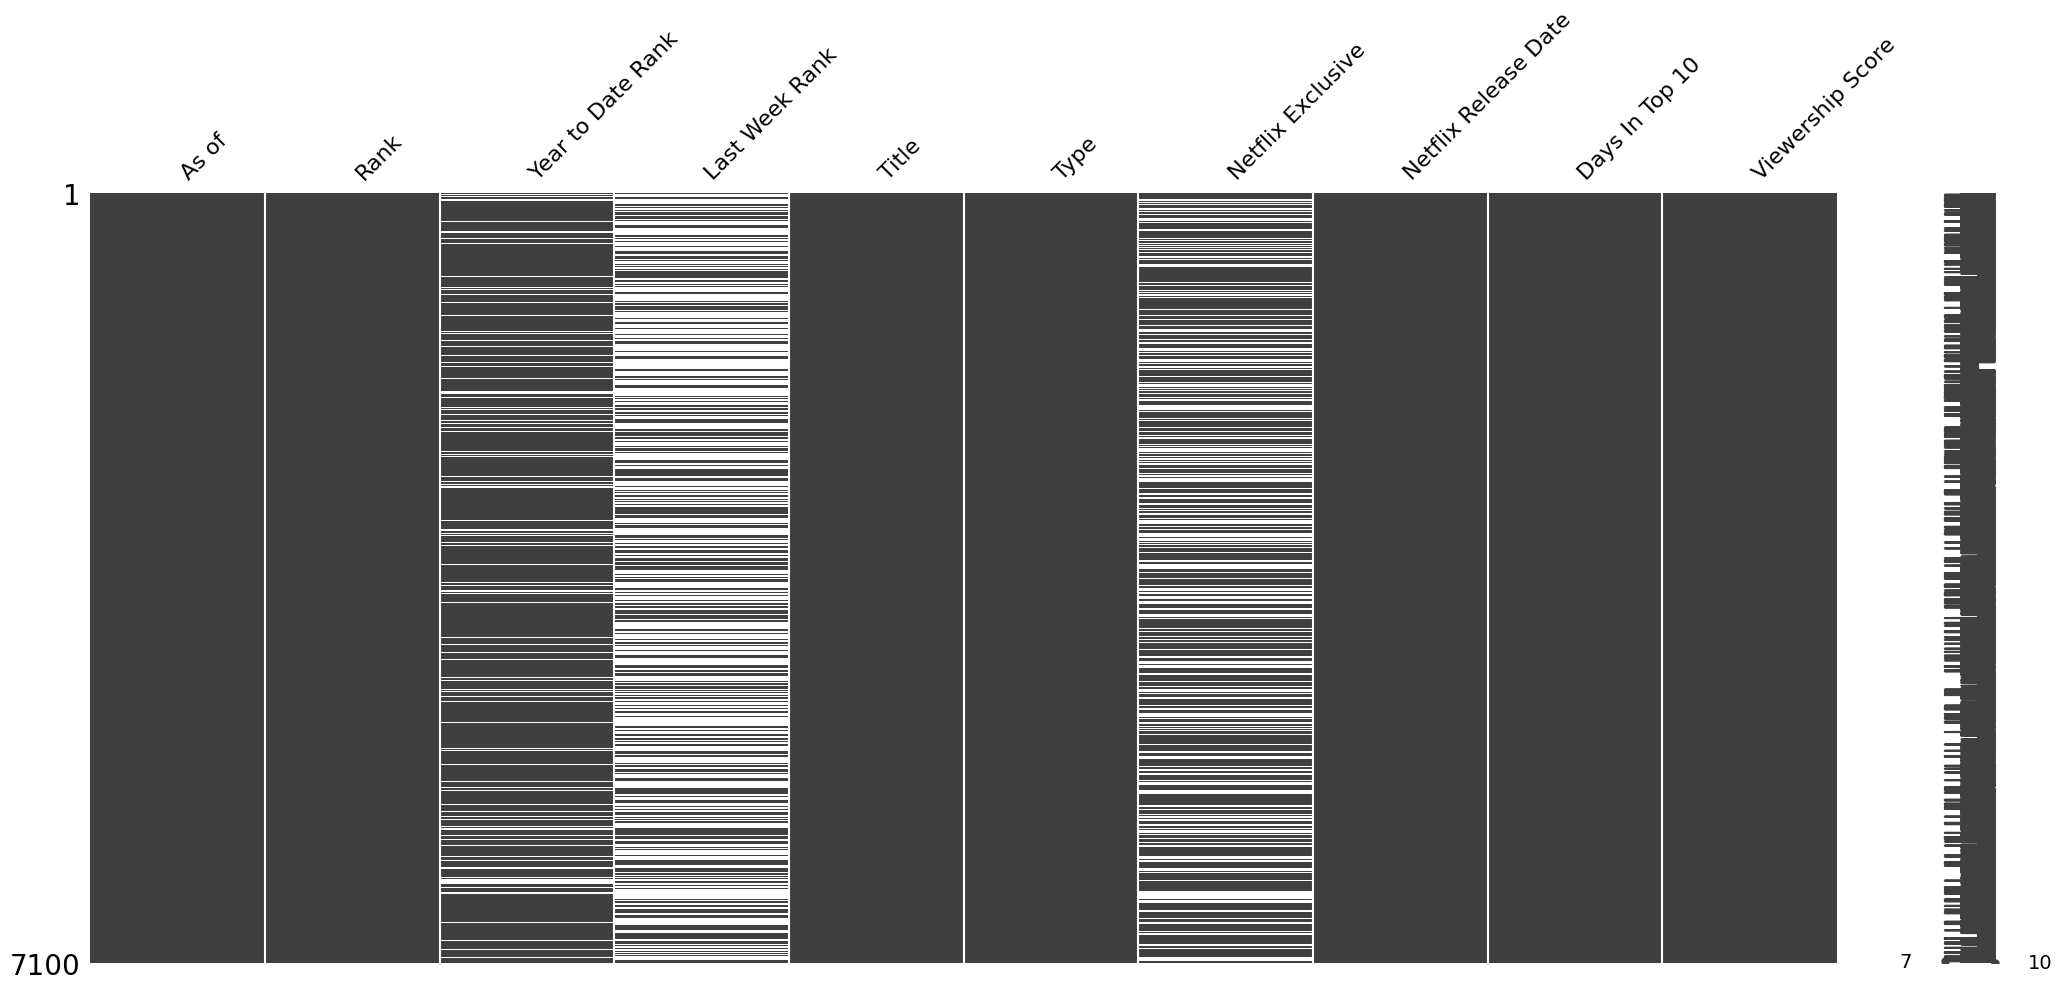

In [8]:
ms.matrix(netflix_df)

The Netflix exclusive column looks like it only has 'Yes'in it. The code below should show that there is no "No". 

In [9]:
netflix_df['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

#### Replace all the missing values in Netflix Exclusive with a "No"

In [10]:
netflix_df['Netflix Exclusive']=netflix_df['Netflix Exclusive'].fillna('No')
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,NaN,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,NaN,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,2022-02-25,14,100
7097,2022-03-11,8,8,NaN,Shooter,Movie,No,2014-08-01,3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,2022-03-01,10,33


####  Drop the Last Week Rank because it has more than 50% data missing in it. 

In [11]:
netflix_df.drop(['Last Week Rank'], axis=1, inplace=True)
netflix_df

,As of,Rank,Year to Date Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,The Platform,Movie,Yes,2020-03-20,9,55
...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81
7096,2022-03-11,7,7,Vikings: Valhalla,TV Show,Yes,2022-02-25,14,100
7097,2022-03-11,8,8,Shooter,Movie,No,2014-08-01,3,7
7098,2022-03-11,9,9,Shrek 2,Movie,No,2022-03-01,10,33


#### 12 percent of the Year to Date Rank has missing values, we delete the Year to Date Rank column. This column will not be useful in our analysis. 


In [12]:
netflix_df.drop(['Year to Date Rank'], axis=1, inplace=True)
netflix_df

,As of,Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,The Platform,Movie,Yes,2020-03-20,9,55
...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,Worst Roommate Ever,TV Show,Yes,2022-03-01,10,81
7096,2022-03-11,7,Vikings: Valhalla,TV Show,Yes,2022-02-25,14,100
7097,2022-03-11,8,Shooter,Movie,No,2014-08-01,3,7
7098,2022-03-11,9,Shrek 2,Movie,No,2022-03-01,10,33


## Data exploration

#### How many days Netflix Exclusive shows were in the Daily Top 10? 

In [13]:
exclusive_days = netflix_df.groupby(["Netflix Exclusive"]).count()
exclusive_days

,As of,Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
Netflix Exclusive,,,,,,,
No,2501,2501,2501,2501,2501,2501,2501
Yes,4599,4599,4599,4599,4599,4599,4599


[Text(0, 0, '4599'), Text(0, 0, '2501')]

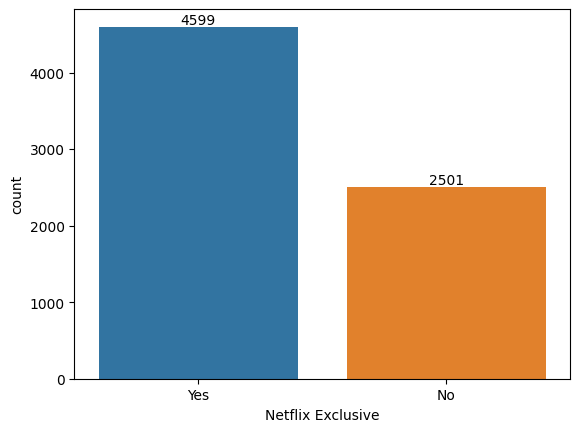

In [14]:
#Netflix exlcusive countplot
ax = sns.countplot(data=netflix_df,x=netflix_df['Netflix Exclusive'])
ax.bar_label(ax.containers[0])


#### To get which types of shows were in the Daily Top 10 more, we are going to use the Type column as the hue parameter

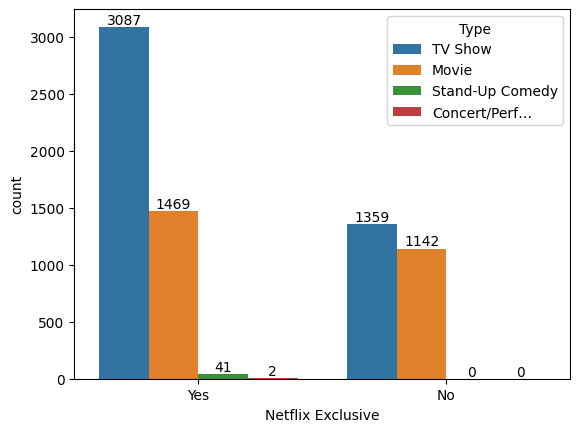

In [15]:
ax = sns.countplot(x="Netflix Exclusive" , data=netflix_df ,hue="Type")
for container in ax.containers:
    ax.bar_label(container)

#### Top shows in each show type

#### Which shows were Top 10 in the TV Shows type? 

In [16]:
# Getting to know the Top 10 TV Shows by grouping them.
tv_shows= netflix_df[netflix_df['Type']=='TV Show']
tv_shows_top=tv_shows.groupby('Title')['Days In Top 10'].max().sort_values(ascending=False)[0:11]
tv_shows_top

Title
Cocomelon               428
Ozark                    89
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             66
Bridgerton               58
Lucifer                  57
Virgin River             55
Name: Days In Top 10, dtype: int64

#### Data Visualization - WordCloud for TV Shows

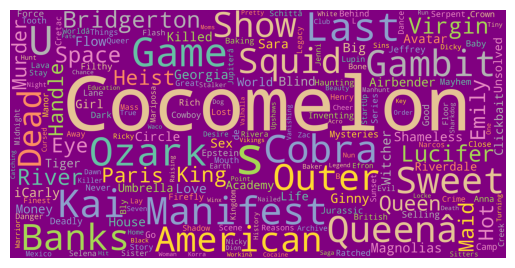

In [28]:
text = " ".join(cat for cat in tv_shows['Title'])
# Generate word cloud
word_cloud = WordCloud(
        width=4000,
        height=2000,
        random_state=123,
        background_color="purple",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,
    ).generate(text)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()


#### Top 10 in the Movies 

In [18]:
movies = netflix_df[netflix_df['Type']=='Movie']
movies_top = movies.groupby('Title')['Days In Top 10'].max().sort_values(ascending=False)[0:11]
movies_top

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
Donât Look Up                   26
The Christmas Chronicles 2        24
Illumination Presents The G…      24
We Can Be Heroes                  24
Red Notice                        23
The Unforgivable                  22
Name: Days In Top 10, dtype: int64

#### Data Visualization - WordCloud for TV Shows

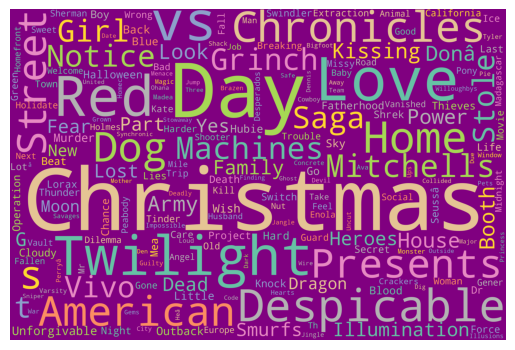

In [19]:
text = " ".join(cat for cat in movies['Title'])
# Generate word cloud
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=123,
        background_color="purple",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,
    ).generate(text)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#### Comedies from most watched to less watched

In [20]:
comedy = netflix_df[netflix_df['Type']=='Stand-Up Comedy']
comedy_top = comedy.groupby('Title')['Days In Top 10'].max().sort_values(ascending=False)[0:11]
comedy_top

Title
Dave Chappelle: The Closer        16
Kevin Hart: Zero F**ks Given      10
George Lopez: Weâll Do It f…     5
Jerry Seinfeld: 23 Hours to…       5
Chris DâElia: No Pain            3
Bo Burnham: Inside                 2
Name: Days In Top 10, dtype: int64

#### Visualization for most to less watched comedies - Donut chart

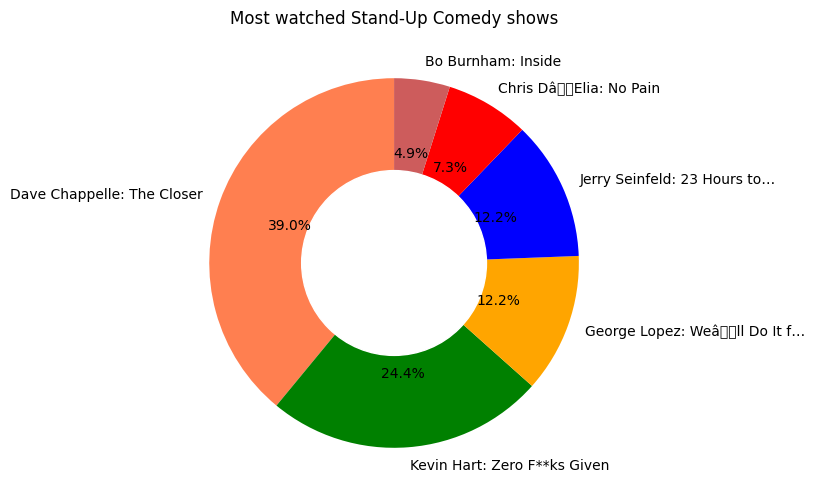

In [21]:
#PIE for Netflix TYPEs counts in days

# Create a circle at the center of
# the plot
my_circle = plt.Circle((0, 0), 0.5, color='white')

plt.figure(figsize=(6,6))
colors = ['coral','green','orange','blue', 'red', 'indianred']
plt.pie(comedy['Title'].value_counts(),
    shadow=False,
    colors=colors,
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 10},
       labels=comedy_top.keys())
plt.title('Most watched Stand-Up Comedy shows')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [22]:
comedy_top = comedy.groupby('Title')['Viewership Score'].max().sort_values(ascending=False)[0:11]
comedy_top

Title
Dave Chappelle: The Closer        88
Kevin Hart: Zero F**ks Given      73
Jerry Seinfeld: 23 Hours to…      25
George Lopez: Weâll Do It f…    24
Chris DâElia: No Pain           16
Bo Burnham: Inside                 2
Name: Viewership Score, dtype: int64

#### Visualization of Viewership score, Rank and Days in the top 10 - Comedy

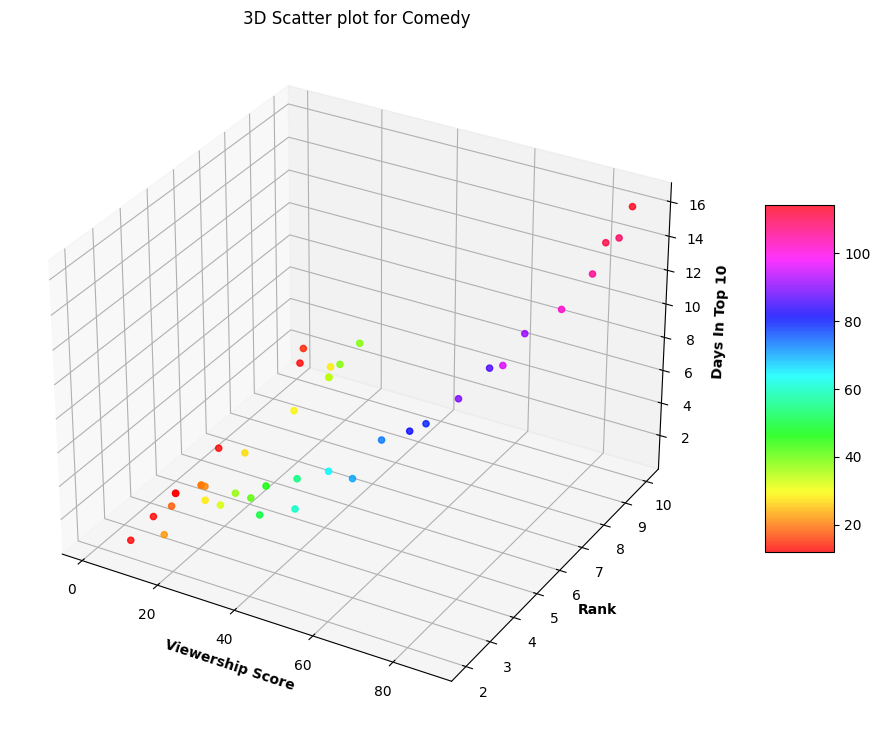

In [23]:

# Creating dataset
z = comedy['Days In Top 10']
x = comedy['Viewership Score']
y = comedy['Rank']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')
 
# Creating plot
scatter = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap)
 
plt.title("3D Scatter plot for Comedy")
ax.set_xlabel('Viewership Score', fontweight ='bold')
ax.set_ylabel('Rank', fontweight ='bold')
ax.set_zlabel('Days In Top 10', fontweight ='bold')
fig.colorbar(scatter, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

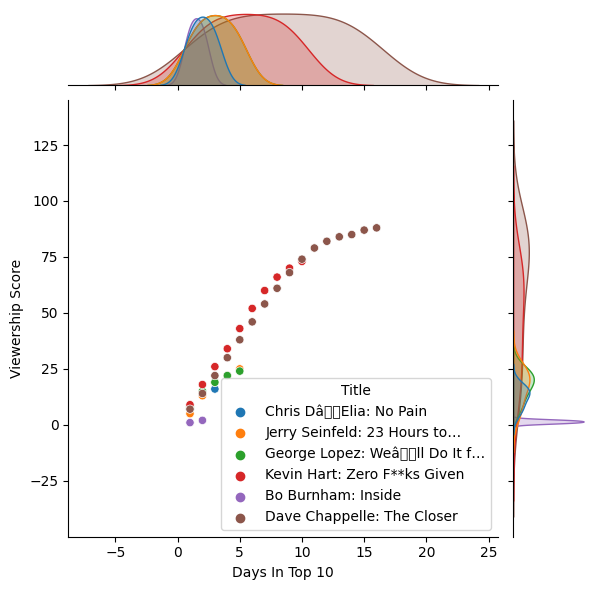

In [24]:
sns.jointplot(data=comedy, x="Days In Top 10", y="Viewership Score", hue = "Title")

In [25]:
#CONCERTS TYPE DATA
netflix_df[netflix_df['Type']=='Concert/Perf…']


,As of,Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2651,2020-12-22,2,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,1,9
2664,2020-12-23,5,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,2,15


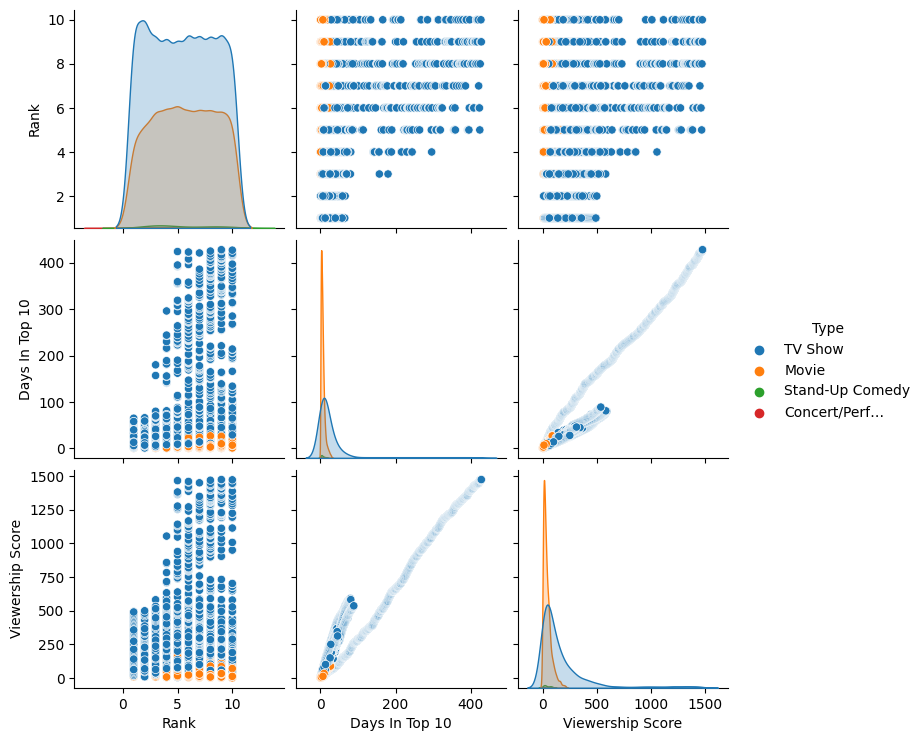

In [26]:
#PAIRPLOT
sns.pairplot(netflix_df, hue='Type')


## Conclusions


-TV series are more likely than movies, stand-up comedy specials, and concerts to remain in the Top 10. This makes logical given that a TV season is longer to watch.

-Ariana Grande's Excuse Me, I Love You was the only concert to appear in the Netflix Daily Top 10 from 2020 to 2022, spending two days there.

-From 2020 to 2022, Dave Chappelle and Kevin Hart were the only two comedians to remain in the top 10 on Netflix for ten or more days.

-Cocomelon TV Show, followed by "Ozark," spent the most days in the top 10 over the course of two years (428).

-The only film to spend more than 30 days at the top of the charts was "Mitchells vs. The Machines."

-The greatest performers in the TV programs category are Netflix Exclusive.

-There are no stand-up comedy shows that are not Netflix-exclusive.

-The Viewership Score increases with the Days In the Top 10 because it is the assigned to the show depending on what position in the Top 10 the show is on a day it is in the Top 10. This means Cocomelon and Ozark have the highest Viewership Scores. 
